In [1]:
import yfinance as yf 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = yf.download('XOM', start='2023-01-01', end='2024-12-31')
df = df['Close'].dropna()
df['returns'] = df['XOM'].pct_change().dropna()
df['Cumulative return'] = (1+df['returns']).cumprod().dropna()
df['Cumulative max'] = df['Cumulative return'].cummax()
df['Drawdown'] = (df['Cumulative return'] - df['Cumulative max'])/df['Cumulative max']
MDD = df['Drawdown'].min()

C:\Users\arthu\AppData\Local\Temp\ipykernel_15472\2446823788.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('XOM', start='2023-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


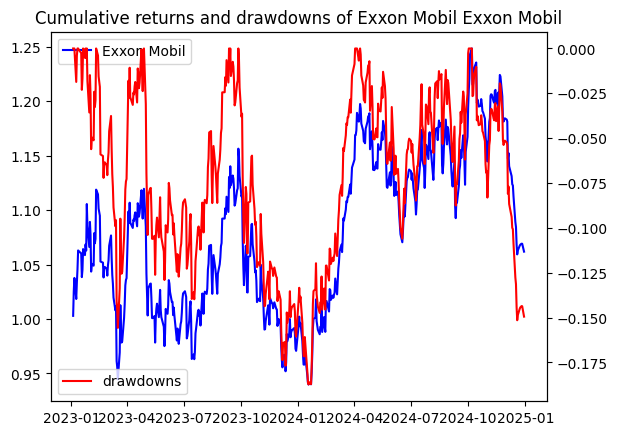

<Figure size 1500x1000 with 0 Axes>

In [3]:
#Visualisation
plt.plot(df.index, df['Cumulative return'], color='blue', label = 'Exxon Mobil')
plt.legend()
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(df.index, df['Drawdown'], color='red', label='drawdowns')
plt.title('Cumulative returns and drawdowns of Exxon Mobil Exxon Mobil')
plt.legend()
plt.figure(figsize=(15,10))
plt.show()